# KMeans 算法探究

聚类算法是一种非监督算法，当你拥有大量的无标签数据的时候，最方便的做法就是对这些数据用聚类算法进行分类，打上标签。


> **什么是非监督学习？**
> 非监督学习与监督学习相对应。打个比方，监督学习就是给你在看了很多猫的照片后，学习到了猫的特征，于是在新看到猫片时，就马上认出了这是猫了；而非监督学习就是你看了很多动物照片，你发现有一类动物四条腿，有长胡须，浑身是毛，于是认为这可能是同一种物种（猫）。简单来说，监督学习就是老师教知识，你学会举一反三；非监督学习就是你从大量的数据中自己总结知识，自学成才。

kmeans 就是一种非监督的聚类算法，它十分简单易懂，并且还很有效。

你可以在很多地方应用看到KMeans的应用：

* 图像分割
* 基因片段分类
* 文章标签归类
* 物种种群分类
* 异常数据检测

是的，KMeans 就是这么有用的算法，关键是还很简单。现在我们用一个简单的场景来实现一个 KMeans。

在一个平面上，有一堆看起来杂乱无章的点（至少计算机看起来是这样的），我们希望按照点的聚集密度将这些点分类。

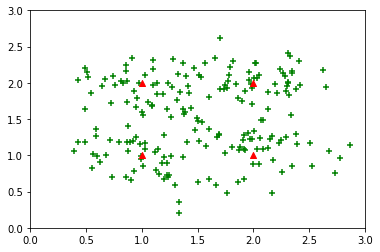

200
200


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 先在四个中心点附近产生一堆数据
real_center = [(1, 1), (1, 2), (2, 2), (2, 1)]
point_number = 50

points_x = []
points_y = []

for center in real_center:
    offset_x, offset_y = np.random.randn(point_number) * 0.3, np.random.randn(point_number) * 0.25
    x_val, y_val = center[0] + offset_x, center[1] + offset_y

    points_x.append(x_val)
    points_y.append(y_val)
    
points_x = np.concatenate(points_x)
points_y = np.concatenate(points_y)

# 绘制点图
plt.scatter(points_x, points_y, color='green', marker='+')
# 绘制中心点
center_x, center_y = zip(*real_center)
plt.scatter(center_x, center_y, color='red', marker='^')
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.show()
print(len(points_x))
print(len(points_y))
#print(points_x)
#print(points_y)

我们以(1, 1), (1, 2), (2, 2), (2, 1)四个点为中心产生了随机分布的点，如果我们的聚类算法正确的话，我们找到的中心点应该和这四个点很接近。先用简单的语言描述 kmeans 算法步骤：

- 第一步 - 随机选择 K 个点作为点的聚类中心，这表示我们要将数据分为 K 类。
- 第二步 - 遍历所有的点 P, 算出 P 到每个聚类中心的距离，将 P 放到最近的聚类中心的点集中。遍历结束后我们将得到 K 个点集。
- 第三步 - 遍历每一个点集，算出每一个点集的中心位置，将其作为新的聚类中心。
- 第四步 - 重复步骤 2 和步骤 3，直到聚类中心位置不再移动。

[ 77 105 136  71]
[[0.86394919 2.02064857]
 [1.76900044 2.02029322]
 [2.2348496  2.19693804]
 [1.34174135 1.86852855]]


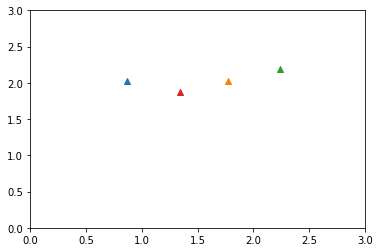

In [3]:
# 第一步，随机选择 K 个点
K         = 4
p_list    = np.stack([points_x, points_y], axis=1)
#np.stack(arrays, axis=1)表示arrays[0][0], arrays[1][0]和arrays[2][0]进行堆叠，然后是arrays[0][1]，arrays[1][1]与arrays[2][1]进行堆叠。
#print(p_list)
index     = np.random.choice(len(p_list), size=K)
print(index)
centeroid = p_list[index]
print(centeroid)

# 以下是画图部分
for p in centeroid:
    plt.scatter(p[0], p[1], marker='^')
    
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.show()


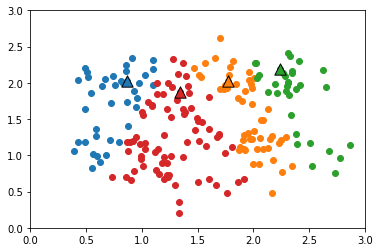

In [4]:
# 第二步，遍历所有点 P，将 P 放入最近的聚类中心的集合中
points_set = {key: [] for key in range(K)}

for p in p_list:
    nearest_index = np.argmin(np.sum((centeroid - p) ** 2, axis=1) ** 0.5)#得到的是最小值的索引值
    points_set[nearest_index].append(p)

# 以下是画图部分
for k_index, p_set in points_set.items():
    p_xs = [p[0] for p in p_set]
    p_ys = [p[1] for p in p_set]
    plt.scatter(p_xs, p_ys, color='C{}'.format(k_index))#format===格式化输出

for ix, p in enumerate(centeroid):
    plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=128)

plt.xlim(0, 3)
plt.ylim(0, 3)
plt.show()

In [5]:
# 第三步，遍历每一个点集，计算新的聚类中心
for k_index, p_set in points_set.items():
    p_xs = [p[0] for p in p_set]
    p_ys = [p[1] for p in p_set]
    centeroid[k_index, 0] = sum(p_xs) / len(p_set)
    centeroid[k_index, 1] = sum(p_ys) / len(p_set)

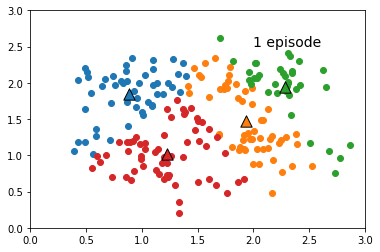

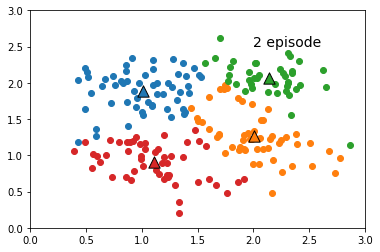

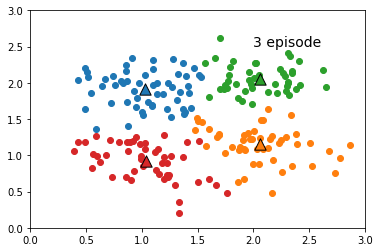

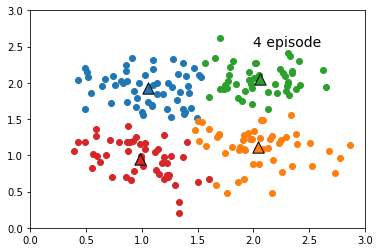

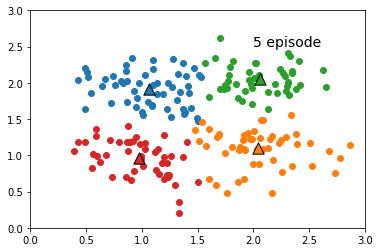

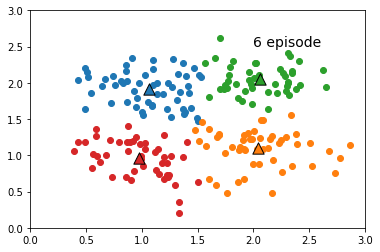

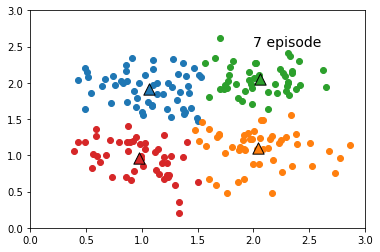

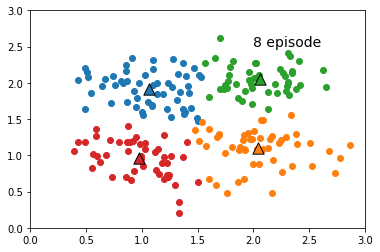

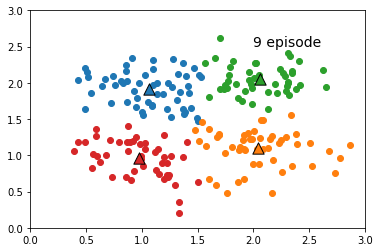

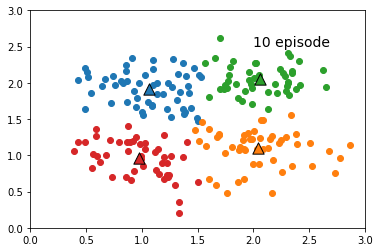

[[1.06039645 1.91535716]
 [2.04305687 1.09456368]
 [2.06292491 2.04814791]
 [0.97081093 0.95724315]]


In [6]:
# 第四步，重复进行以上步骤
for i in range(10):
    points_set = {key: [] for key in range(K)}

    for p in p_list:
        nearest_index = np.argmin(np.sum((centeroid - p) ** 2, axis=1) ** 0.5)
        points_set[nearest_index].append(p)
        
    for k_index, p_set in points_set.items():
        p_xs = [p[0] for p in p_set]
        p_ys = [p[1] for p in p_set]
        centeroid[k_index, 0] = sum(p_xs) / len(p_set)
        centeroid[k_index, 1] = sum(p_ys) / len(p_set)
        
    for k_index, p_set in points_set.items():
        p_xs = [p[0] for p in p_set]
        p_ys = [p[1] for p in p_set]
        plt.scatter(p_xs, p_ys, color='C{}'.format(k_index))

    for ix, p in enumerate(centeroid):
        plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=128)
    
    plt.xlim(0, 3)
    plt.ylim(0, 3)
    plt.annotate('{} episode'.format(i + 1), xy=(2, 2.5), fontsize=14)
    plt.show()

print(centeroid)

# 寻找 K 值

以上已经介绍了 KMeans 方法的具体流程，但是我们还面临一个问题，如何确定 K 值——在以上的演示中，由于数据是我们自己生成的，所以我们很容易就确定了 K 值，但是真实的环境下，我们往往不能立马清楚 K 值的大小。

一种比较通用的解决方法是计算每个点到自己的聚类中心的平均距离，虽然说，K 值越大，理论上这个平均距离会越小。但是当我们画出平均距离随K值的变化曲线后，会发现其中存在一个肘点——在这个肘点前，平均距离随K值变大迅速下降，而在这个肘点后，平均距离的下降将变得缓慢。现在我们使用 sklearn 库中的 KMeans 方法来跑一下聚类过程，然后将到聚类中心的平均值变化作图。

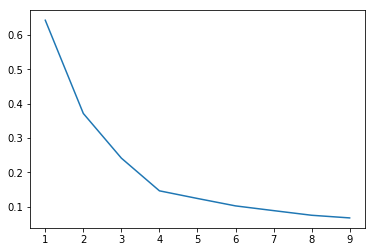

In [7]:
from sklearn.cluster import KMeans

loss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=100).fit(p_list)
    loss.append(kmeans.inertia_ / point_number / K)
    
plt.plot(range(1, 10), loss)
plt.show()

很好，我们看到在 K = 4 是我们的肘点了。在 K = 4 之前，距离迅速下降，而在到了 4 后，下降速度明显降低。那我们就可以知道，4 就是一个最优的聚类数啦